In [3]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import sys
import numpy as np
import matplotlib.patches as patches
import glob

def count_lines(f):
    lineCount = 0
    with open(f, 'r') as f:
        for line in f:
            lineCount += 1
        return lineCount
def runCMD(cmd):
    val = subprocess.Popen(cmd, shell=True).wait()
    if val == 0:
        pass
    else:
        print ('command failed')
        print (cmd)
        sys.exit(1)

In [2]:
#Define admixture directory
adDir = '/home/ampend/links/kidd-lab/ampend-projects/cfERVs/ADMIXTURE/'
inDir = adDir + 'input/'

Set = 'No_Outgroups'


In [4]:
#make sample information file
sampleFile = open(adDir + 'input/sample-names-to-groups.txt', 'r')
sampleDict = {}
for line in sampleFile:
    line=line.rstrip().split('\t')
    if 'sample' in line[0]: #skips header
        continue
    sampleDict[line[0]] = line

In [5]:
#parse the input .fam file
famFile = open(adDir + 'input/final-mergeALL_nomissing_pruned_noOutgroup_thinned.fam','r')
dogData = {}

#outfile is the .ind file that we want to create for plotting admixture results
#Structure is sample ID, sex, population (3 tab delimited columns)
indFile = open(adDir + 'input/final-mergeALL_nomissing_pruned_noOutgroup_thinned.ind', 'w')

#Processing the .fam file to write to indFile
index=0
for line in famFile:
    line=line.rstrip().split(' ')
    index += 1
    dogData[index] = ([line[0],line[4],line[2]])
    sampleID = line[0]
    indFile.write('%s\t%s\t%s' % (line[0],line[4],line[2]))

In [6]:
#Determining the order I want to plot the dogs in for the bar plot FOR ddPCR ONLY
plotOrder = []
skip = ['CHMO02', 'AF01']

inFile = open(adDir + 'input/' + 'plot-order-samples.txt')
for line in inFile:
    if 'sample' in line: #skips header
        continue
    line = line.rstrip().split('\t')
    sampleID = line[0]
    if sampleID in skip: #if the sample ID is one we want to skip because it has been filtered out
        continue
    plotOrder.append([line[0],line[1],line[2],line[3]])
inFile.close()
print('%i samples read into Plot Order' % len(plotOrder))

337 samples read into Plot Order


In [7]:
def get_AD_data(dogData,k):
    inFile = open(runDir + 'final-mergeALL_nomissing_pruned_noOutgroup_thinned.%i.Q' % k, 'r')
    ADdata, index = {}, 0
    for line in inFile:
        line = line.rstrip().split(' ')
        index += 1
        sampleID = dogData[index][0]
        ADdata[sampleID] = line    
    return ADdata
########################################################################################################
def get_cross_validation_errors(runNum,k):
    inFile = open(runDir + 'final-mergeALL_nomissing_pruned_noOutgroup_thinned_Run%i_log%i.out' % (runNum,k), 'r')
    for line in inFile:
        line=line.rstrip()
        if 'CV error' not in line:
            continue
        line=line.split(' ')
        CV = float(line[3])
        return CV
########################################################################################################
def draw_plot(plotFile,plotOrder,k,ADdata):
    labelFont  = {'fontname':'Arial'}
    width = 1.0
    names,ticks,labels = [], [], {}
    plt.figure(figsize=(45,15))

    for i in range(len(plotOrder)):
        sample = plotOrder[i][0]
        prev_height = 0
        for num in range(0,10):
            if num > k - 1:
                height = 0
            else:
                height = float(ADdata[sample][num]) * 100
            _ = plt.bar(i, height, width, bottom = prev_height,edgecolor='black')
            prev_height = prev_height + height
        names.append(plotOrder[i][3] + '_' + plotOrder[i][0])
        ticks.append(i)

    _ = plt.xticks(ticks,names,rotation=90)
    _ = plt.xlim([-1,ticks[-1]+1])
    _ = plt.yticks([])
    _ = plt.ylim([0,100])
    _ = plt.vlines(x=191.5,ymin=0,ymax=100, lw=3,color="white")
    _ = plt.vlines(x=301.5,ymin=0,ymax=100, lw=3,color="white")

    plt.legend(loc=2)
    plt.subplots_adjust(bottom=0.25)
    plt.text(78, -35, 'Breed Dogs', fontsize=40)
    plt.text(232, -35, 'Village Dogs', fontsize=40)
    plt.text(310, -35, 'Wolves', fontsize=40)
    plt.ylabel('K = %i' % int(k), fontsize=100)
    plt.title('')
    #plt.tight_layout()
    plt.savefig(plotFile, format='png', dpi=200)

/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


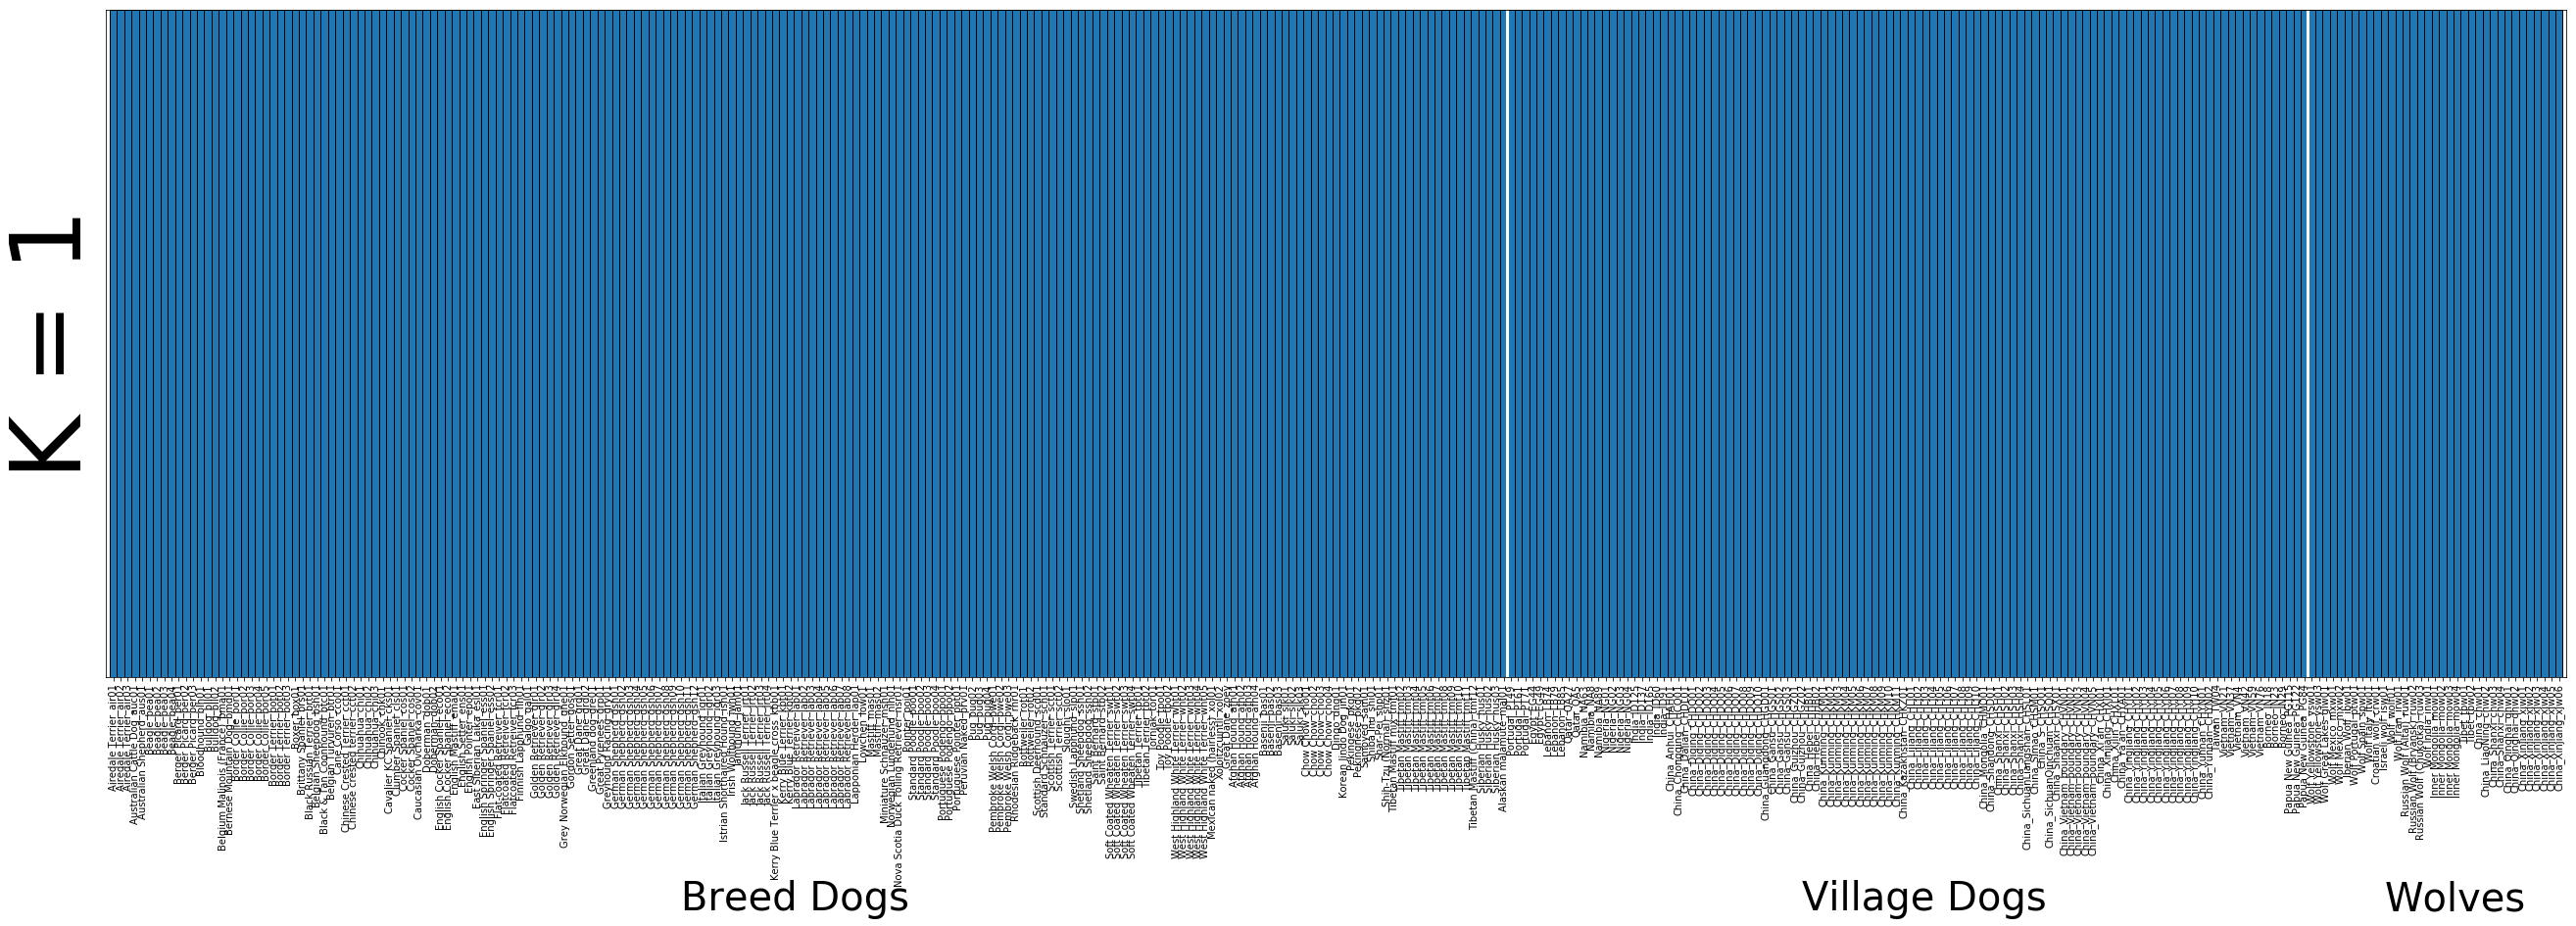

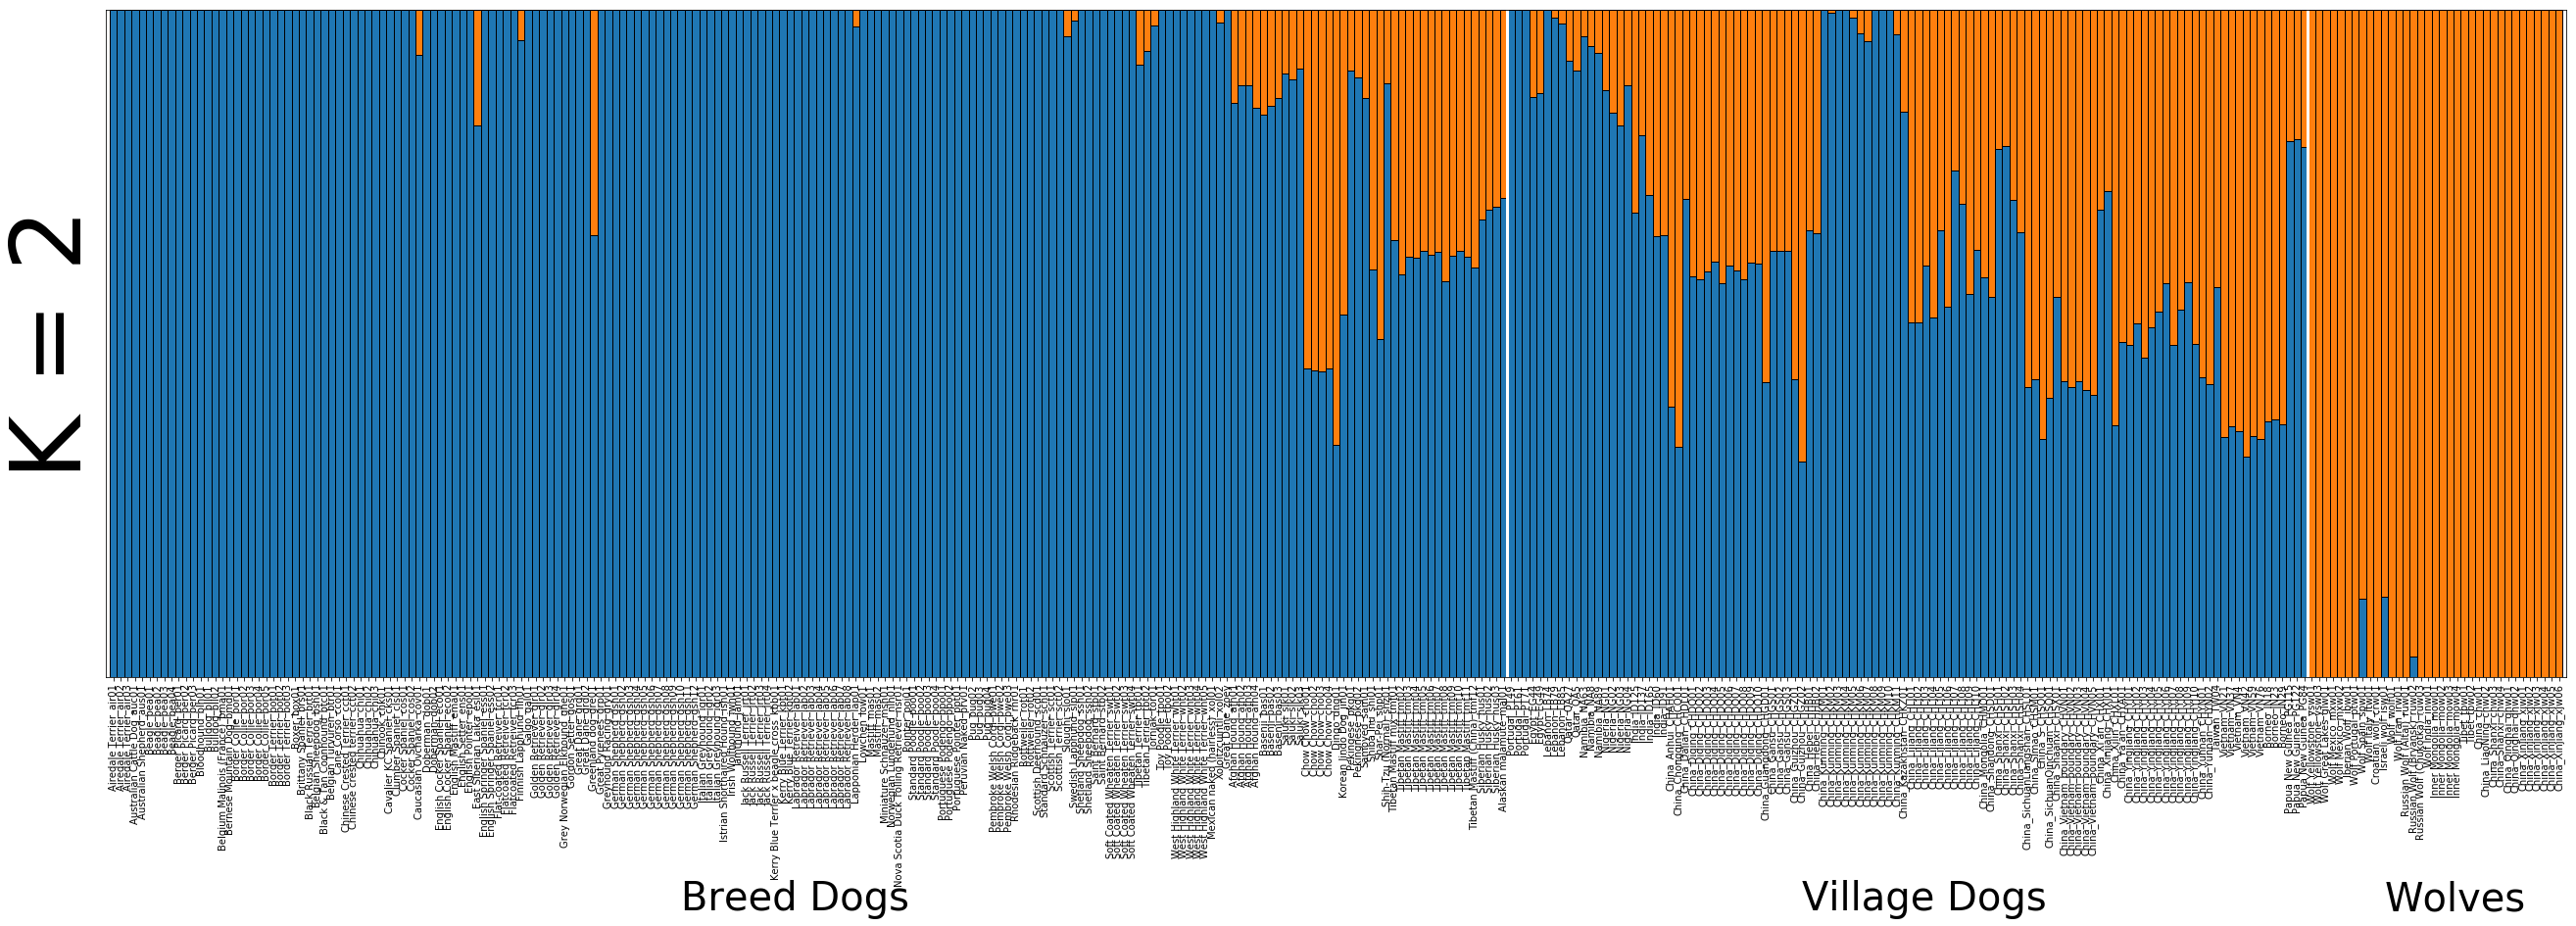

In [ ]:
#For testing = starting with the thinned, no outgroup ADMIXTURE results
resultsDir = adDir + 'results/' + Set + '/'
cvDict = {}

for runNum in range(1,6):
    runDir = resultsDir + 'Run' + str(runNum) + '/'
    #Keeping track of the CV errors
    cvDict[runNum] = ['','','','','','','','','',''] #ten empty slots
    #Get the admixture data
    for k in range (1,11):
        ADdata = get_AD_data(dogData,k)
        #Now parsing the k's
        CV = get_cross_validation_errors(runNum,k)
        cvDict[runNum][k-1] = CV
        #Draw ADMIXTURE plot
        plotFile = resultsDir + 'plots/' + 'Run%i_AdmixturePlot_K%i.png' % (runNum,int(k))
        draw_plot(plotFile,plotOrder,k,ADdata)
        #break
    break

In [ ]:
#For testing = starting with the thinned, no outgroup ADMIXTURE results
resultsDir = adDir + 'results/' + Set + '/'
cvDict = {}

for runNum in range(1,6):
    runDir = resultsDir + 'Run' + str(runNum) + '/'


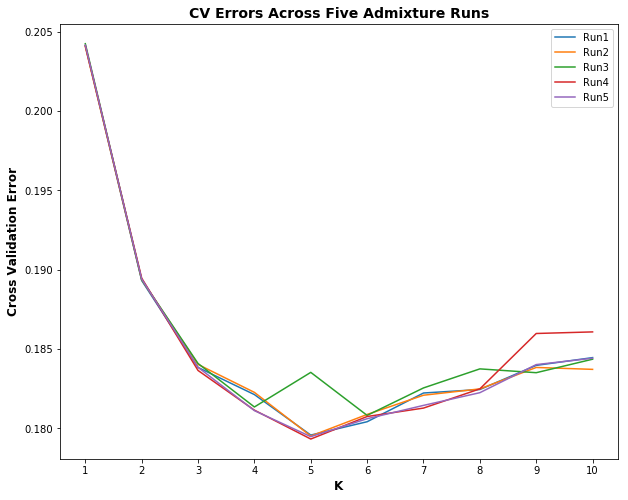

In [66]:
plt.figure(figsize=(10,8))

for i in range(0,len(cvDict)):
    runNum = i + 1
    x = [1,2,3,4,5,6,7,8,9,10]
    y = cvDict[runNum]
    plt.plot(x,y, label='Run'+str(runNum))
_ = plt.xticks([1,2,3,4,5,6,7,8,9,10])
_ = plt.xlabel('K', fontsize=12,fontweight='bold')
_ = plt.ylabel('Cross Validation Error', fontsize=12, fontweight='bold')
plt.legend()
plt.title('CV Errors Across Five Admixture Runs', fontsize = 14, fontweight='bold')